In [1]:
from metric import metric

import category_encoders as ce

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

from clean_database import DataCleaner

In [2]:
dc = DataCleaner("data")
data = dc.get_clean_data()

trainX = data.loc[:"2013-07-31"]
testX = data.loc["2013-08-01":]

trainY = trainX["Sales"]
trainX.drop("Sales", axis=1, inplace=True)

testY = testX["Sales"]
testX.drop("Sales", axis=1, inplace=True)

ct = ColumnTransformer([
        ( "target_enc", ce.target_encoder.TargetEncoder(cols=["Store"]), ["Store"] ),
        ('scaler', StandardScaler(), ['CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month',
       'Day']),
        ("one_hot_enc", OneHotEncoder(handle_unknown="ignore"), ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'])
    ], remainder='passthrough')

pipe = Pipeline([
    ("pre", ct),
    ("rf", RandomForestRegressor(verbose=1, n_jobs=16) )
])

In [3]:
pipe.fit(trainX, trainY)
print(f"Training percentage mean squared error {metric( pipe.predict(trainX), trainY.values )}")
print(f"Test percentage mean squared error {metric( pipe.predict(testX), testY.values )}")

/home/sascha/anaconda3/envs/mini-comp/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    3.7s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:   12.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.6s finished


Training percentage mean squared error 8.366843203992895


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s


Test percentage mean squared error 22.736565697488874


[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.8s finished


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
tree_feature_importances = (
    pipe.named_steps['rf'].feature_importances_)

In [15]:
import pandas as pd

In [26]:
feature_name = ["Store", 'DayOfWeek', 'Promo', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month',
       'Day']

In [27]:
cat = pipe.named_steps["pre"].named_transformers_["one_hot_enc"].categories_

In [28]:
tmp = []
for c in cat:
    tmp.extend(c)
    
feature_name.extend(tmp)

In [40]:
df = pd.DataFrame(zip(feature_name, tree_feature_importances), columns=["category", "importance"])

<AxesSubplot:xlabel='category'>

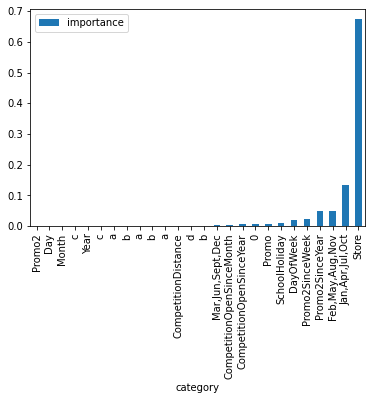

In [42]:
df.sort_values(by="importance").plot.bar(x="category", y="importance")